<h1 style="color: rgb(0, 91, 94);">Fourier Transform</h1>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<h2 style="color: rgb(0, 91, 94);">Introduction</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Within this repository, we will be exploring the concept of <b>Fourier Transform</b>, its definition, application and general usefulness. It is important to discuss these in detail to provide a solid understanding of the principles of Fourier Transform.

There are many applications of a Fourier Transform, which we will discuss as well.

<h2 style="color: rgb(0, 91, 94);">Fourier Transform: Definition</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

To give a understanding to what Fourier Transform is, we must first define what exactly a Fourier Transform is. Originally discussed by the French mathmatician <i>Jean Baptiste Fourier</i>, he described the Fourier Transform to be a mathematical procedure which decomposes and transforms functions into frequency components (from a time domain to a frequency domain).<sup><a href="#references">[1]</a></sup>

Fourier Transform is one of two Fourier expansions which fall under the category of Fourier Analysis. We will also talk about the Inverse Fourier Transform, breaking down it's application in both definition and in code.

The Fourier analysis can be described as the study of general functions which may be represented or decomposed into "trigonometric or exponential functions with definite frequencies".<sup><a href="#references">[2]</a></sup>

The usage of Fourier analysis can be used in a myriad of ways, whether developing computer models or processing and analysing data. 

Fourier Transforms are used for <i>non-periodic</i> functions that can be written into trigometric or exponential functions with a "continuum of possible frequencies". Since these functions can be written in sinusoidal functions, this helps to focus on these functions when solving differing equations, which is easier than using general functions.<sup><a href="#references">[1]</a></sup> Essentially this means we can break down waveforms in a different representation of sines and cosines

<h2 style="color: rgb(0, 91, 94);">Fourier Transform: Formula <sup><a href="#references">[4]</a></sup></h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

$$
y[k] = \sum_{n=0}^{N-1} e^{-2 \pi j \frac{kn}{N}} x[n]
$$

The following formula is is called <b><i>Fast Fourier Transform (FFT)</i></b>, deriving from discrete fourier transforms. Discrete Fourier Transforms are defined by when a given function and its Fourier transform are replaced with "discretized counterparts" (values which are individual and countable).<sup><a href="#references">[3]</a></sup> The below image gives a visual example of this. The purpose of this is to make computations in a faster manner.

<img src="https://learn.g2.com/hs-fs/hubfs/G2CR_B071_Discrete_vs_Continuous_Data_V1.png?width=866"><a href="https://learn.g2.com/hs-fs/hubfs/G2CR_B071_Discrete_vs_Continuous_Data_V1.png?width=866"><center><b>Source</b></center></a></img>


To attempt to use this formula by hand can be seen from a following example done within the lectures of this module on the topic of Fourier Transform. We can also see the same inputs used within a function from the <i>SciPy Python library</i>, which is mainly used for scientific computing.<sup><a href="#references">[4]</a></sup>

In [1]:
# FAST FOURIER TRANSFORM: BY HAND

# Numerical arrays
import numpy as np

# Sample input array
x = np.array([1.0, 2.0, 3.0, -4.0, 5.5])

# Output array
y = []

N = len(x)

# For each index of the length of the input array
for k in range(N):
    y_k = 0.0
    for n in range(N):
        # Increment the value of y[k]
        y_k = y_k + (np.e**(-2 * np.pi * 1j * k * n / N) * x[n])
    y.append(y_k)

# Output the new output array
np.array(y)

array([ 7.5       +0.j        ,  4.12664445-0.78579896j,
       -5.37664445+8.714644j  , -5.37664445-8.714644j  ,
        4.12664445+0.78579896j])

In [2]:
# FAST FOURIER TRANSFROM: SCIPY LIBRARY


# Import the necessary library
from scipy.fft import fft

y = fft(x)
y

array([ 7.5       -0.j        ,  4.12664445-0.78579896j,
       -5.37664445+8.714644j  , -5.37664445-8.714644j  ,
        4.12664445+0.78579896j])

From the above applications of the fast fourier transform, we can see these long strings of values which end with a $j$. These are known as <b>complex numbers</b>.

<h3 style="color: rgb(0, 91, 94);">Complex Numbers</h3>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />
Complex numbers are used by mathematicians, engineers, and physicists but what exactly is a complex number, and what is its role in Fourier Transforms?

A complex number is comprised of a <b>real number</b> and an <i>imaginary one</i> <sup><a href="#references">[5]</a></sup>.
Since waves consist of both magnitude and phase, complex numbers allow for us to visualize both the magnitude and phase of a wave (meaning complex numbers can be seen as two dimensional values). 

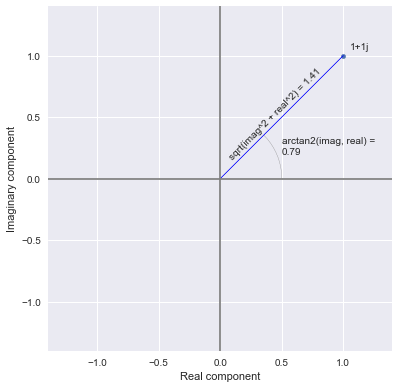

In [3]:
# https://github.com/peterbbryan/Understanding-Fourier/blob/master/fourier_3/medium_graphics/make_graphics_three.py
# Allows us to visualize of both the phase and maginitude represented by a complex number

import matplotlib.pyplot as plt


plt.style.use("seaborn")  # switch to seaborn style


def _figure_1(output_path: str = "./figure_1.png") -> None:
    """
    Plot phase and magnitude.
    Args:
        output_path: Path to write figure to.
    """

    plt.figure()

    # plot a complex number sample
    plt.scatter(1, 1, s=20)
    plt.plot([(0, 0), (1, 1)], linewidth=0.5, color="blue")
    plt.text(1.05, 1.05, "1+1j")

    # plot angle
    theta = np.linspace(0, np.pi / 4, 10)
    x1 = 0.5 * np.cos(theta)
    x2 = 0.5 * np.sin(theta)
    plt.plot(x1, x2, linewidth=0.3, color="gray")
    plt.text(0.5, 0.2, f"arctan2(imag, real) = \n{np.arctan2(1, 1):.2f}")

    # plot distance
    plt.text(
        0.06, 0.16, f"sqrt(imag^2 + real^2) = {np.sqrt(1**2 + 1**2):.2f}", rotation=45
    )

    # rectify the axes
    plt.axhline(y=0, color="gray", linestyle="-")
    plt.axvline(x=0, color="gray", linestyle="-")
    plt.axis("square")
    plt.xlabel("Real component")
    plt.xlim(-1.4, 1.4)
    plt.ylabel("Imaginary component")
    plt.ylim(-1.4, 1.4)

    plt.tight_layout()
    plt.savefig(output_path)

_figure_1()

Essentially, complex numbers allow for us to represent both magnitude and frequency, which can be extracted from them for Fourier Transform.<sup><a href="#references">[6]</a></sup>

<h2 style="color: rgb(0, 91, 94);">Fourier Transform: Breaking down a signal</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Let us create a signal by using sine and cosine functions by using examples representing in class:

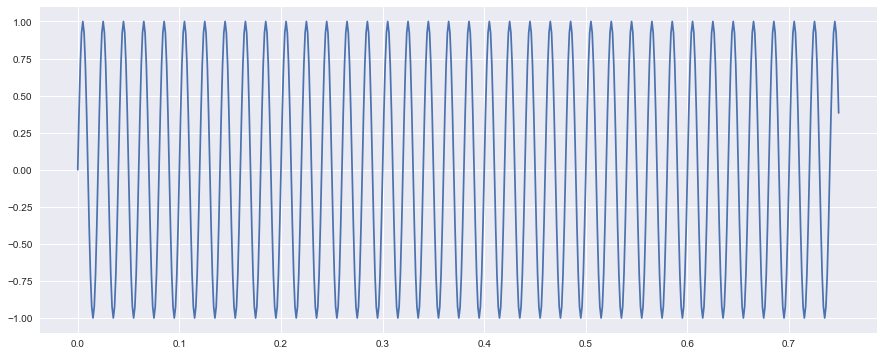

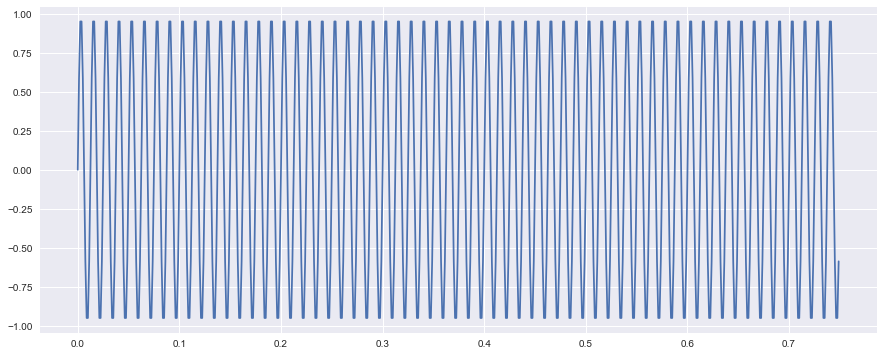

In [4]:
# Example from class: Sine and Cosine Waves

# Number of samples.
N = 600

# Spacing between samples.
T = 1.0 / 800.0

# Range of x (input) values.
x = np.linspace(0.0, N*T, N, endpoint=False)

# First sine wave
y_0 = np.sin(50.0 * 2.0 * np.pi * x)

# Second sine wave
y_1 = np.sin(80.0 * 2.0 * np.pi * x)

# Plot it.
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(x, y_0);

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(x, y_1);

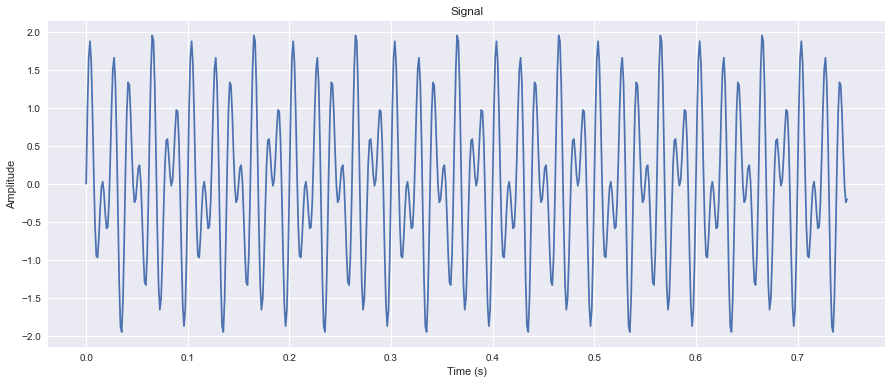

In [5]:
# Sum of the both sin waves
y = y_0 + y_1

# Plot it
fig, ax = plt.subplots(figsize=(15, 6))

plt.title("Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
ax.plot(x, y);

Now that we have created a signal, let's use the Fast Fourier Transform formula we discussed earlier from the <i>SciPy</i> library

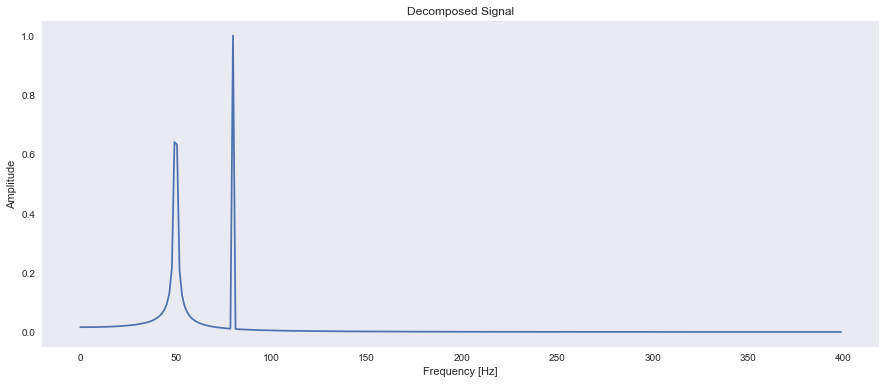

In [6]:
from scipy.fft import fftfreq

# Fast Fourier transform of y
yf = fft(y)

# Frequencies for y
xf = fftfreq(N, T)[:N//2]

# Plot it.
fig, ax = plt.subplots(figsize=(15, 6))
plt.title("Decomposed Signal")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
ax.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid();

<h2 style="color: rgb(0, 91, 94);">Inverse Fast Fourier Transform</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Since we looked at the Fast Fourier transform, it is also useful to take a look at Inverse Fast Fourier Transform as well. Essentially the IFFT let us <u>reverse the effects of the Fast Fourier Transform</u>. Essentially it allows us to convert a signal in the frequency domain (result of Fast Fourier Transform) back to a time or spatial domain.<sup><a href="#references">[7]</a></sup>

In [7]:

# INVERSE FOURIER TRANSFORM: BY HAND

# Sample input array
y = np.array([1.0, 2.0, 3.0, -4.0, 5.5])

# Output array
x = []

N = len(y)

# For each index of the length of the input array
for n in range(N):
    x_n = 0.0
    for k in range(N):
        # Increment the value of x[n]
        x_n = x_n + (1 / N *(np.e**(2 * np.pi * 1j * k * n / N) * y[k]))
    x.append(x_n)

# Output the new output array
np.array(x)

array([ 1.5       +0.j        ,  0.82532889+0.15715979j,
       -1.07532889-1.7429288j , -1.07532889+1.7429288j ,
        0.82532889-0.15715979j])

In [8]:
# INVERSE FOURIER TRANSFROM: SCIPY LIBRARY

# Import the necessary library

from scipy.fft import ifft
yinv = ifft(y)
yinv

array([ 1.5       -0.j        ,  0.82532889+0.15715979j,
       -1.07532889-1.7429288j , -1.07532889+1.7429288j ,
        0.82532889-0.15715979j])

<h3 style="color: rgb(0, 91, 94);">Reverting the decomposed signal <sup><a href="#references">[4]</a></sup></h3>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Now that we introduced the Inverse Fast Fourier Transform briefly, we can start to revert the signal that we decomposed earlier.

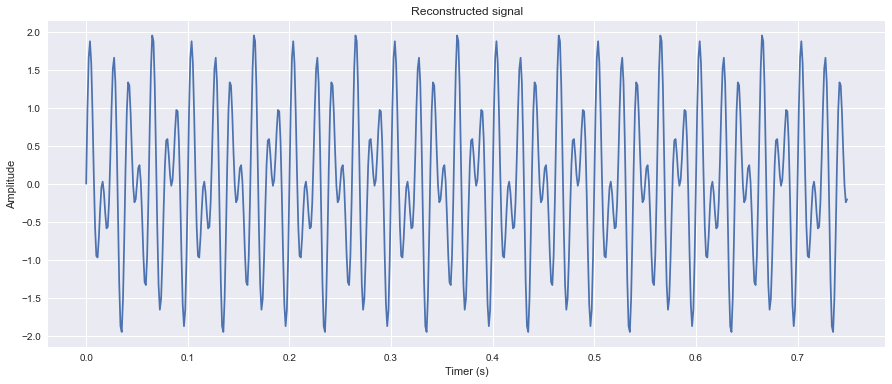

In [44]:
from scipy.fft import fftfreq

# Number of samples.
N = 600

# Spacing between samples.
T = 1.0 / 800.0

# Range of x (input) values.
x = np.linspace(0.0, N*T, N, endpoint=False)

# Create a sine wave with multiple frequencies
y =  np.sin(50.0 * 2.0 * np.pi * x) + np.sin(80.0 * 2.0 * np.pi * x)

# Do a Fourier transform on the signal

tx  = fft(y);

# Do an inverse Fourier transform on the signal

itx = ifft(tx);

# Plot the original sine wave using inverse Fourier transform

fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(x, np.real(itx));
plt.title("Reconstructed signal");
plt.xlabel('Timer (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show();

<h2 style="color: rgb(0, 91, 94);">Fourier Transform: Usage</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Now that we've discussed the Fourier Transform in detail and explained it within code, another important question remains. What are real world applications of the Fourier Transform and where can it be useful?

There are many ways Fourier Transform can be used (image processing, computer vision etc.)<sup><a href="#references">[8]</a></sup>, so let's take a look at a few examples from a <i>Siemes</i> article on the applications of Fourier Transform.<sup><a href="#references">[9]</a></sup>

<h3 style="color: rgb(0, 91, 94);">Audio Filtering</h3>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

The Fourier transform is easier to visualize in terms of audio filtering. Since Fourier transform allows us to decompose a signal, it allows for us to control certain aspects of the overall sound. An example of this within the Siemens article, mentions the usage of this during the 2010 World Cup. Since the usage of instruments by fans made alot of noise on broadcast, they were able to interpret the frequency that the particular instrument emitted. By doing this they were able to actually filter out the noise, which was done by broadcasters to increase the quality of the viewing experience.<sup><a href="#references">[10]</a></sup> 

<h3 style="color: rgb(0, 91, 94);">Engine Noise/Vibration</h3>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Engine troubles can actually be identified using the fourier transform. Since certain components have a unique signature, this allows to be able to identify the particular components in which are causing issues.

<img src="https://community.sw.siemens.com/servlet/rtaImage?eid=ka64O000000kDSq&feoid=00N4O000006Yxpf&refid=0EM4O00000113R6"><a href="https://community.sw.siemens.com/servlet/rtaImage?eid=ka64O000000kDSq&feoid=00N4O000006Yxpf&refid=0EM4O00000113R6"><center><b>Source</b></center></a></img>

Fourier Transform can even be used to determine the differences between a petrol engine and a diesel engine based on frequency.<sup><a href="#references">[10]</a></sup> 

<h2 style="color: rgb(0, 91, 94);">References</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<div id="references">
    <p>
        [1] Ijirset (Journal): <a href="http://www.ijirset.com/upload/2018/november/46_Applications%20of%20Fourier%20transform%20in%20Engineering%20Field%20_1_.pdf">Applications of Fourier Transform in Engineering Field</a><br><br>
        [2] Scholars at Harvard (Notes): <a href="https://scholar.harvard.edu/files/david-morin/files/waves_fourier.pdf">Fourier analysis</a><br><br>  
        [3] G2 - Business Software Reviews (Website): <a href="https://www.g2.com/articles/discrete-vs-continuous-data">Discrete vs. Continuous Data</a><br><br>  
        [4] SciPy: Documentation: <a href="https://docs.scipy.org/doc/scipy/tutorial/fft.html">Fourier Transforms</a><br><br> 
        [5] The Fourier Transform (Website): <a href="https://docs.scipy.org/doc/scipy/tutorial/fft.html">Fourier Transforms - Introduction to Complex Math</a><br><br>  
        [6] Towards Data Science (Website): <a href="https://towardsdatascience.com/the-fourier-transform-3-magnitude-and-phase-encoding-in-complex-data-8184e2ef75f0">Magnitude and phase encoding in complex data</a><br><br>  
        [7] Radiopaedia (Website): <a href="https://radiopaedia.org/articles/inverse-fourier-transformation-1">Inverse Fourier transformation</a><br><br>  
        [8] Medium (Website): <a href="https://medium.com/analytics-vidhya/why-fourier-transform-is-so-important-cb7841733bb8">Why Fourier Transform is so important?</a><br><br>  
        [9] Siemens (Website): <a href="https://medium.com/analytics-vidhya/why-fourier-transform-is-so-important-cb7841733bb8">What is the Fourier Transform?</a><br><br> 
        [10] Sports Business Journal (Website): <a href="https://www.sportsbusinessjournal.com/Daily/Issues/2010/06/16/Sports-Media/World-Cup-Audio-Filters-Increased-To-Diminish-Vuvuzela-Sound.aspx">World Cup Audio Filters Increased To Diminish Vuvuzela Sound</a><br><br> 
        [10] E3S Web of Conferences 130, 01011 (2019)(Conference): <a href="https://www.sportsbusinessjournal.com/Daily/Issues/2010/06/16/Sports-Media/World-Cup-Audio-Filters-Increased-To-Diminish-Vuvuzela-Sound.aspx">Automatic Petrol and Diesel Engine Sound Identification Based on Machine Learning</a><br><br> 
</div>
</div>

<h3 style="color: rgb(0, 91, 94);">Further Study</h3>
<hr style="border-top: 1px solid rgb(0, 91, 94);" />

 - <a href="https://youtu.be/spUNpyF58BY">But what is the Fourier Transform? A visual introduction</a><br>
 - <a href="https://prajwalsouza.github.io/Experiments/Fourier-Transform-Visualization.html">Fourier Transform Visualization</a>





<!--<sup><a href="#references">[5]</a></sup>!-->